In [75]:
import networkx as nx
import json
import os
import yaml
from textwrap import dedent
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
import sklearn.preprocessing
import math
import matplotlib.pyplot as plt
import sklearn.decomposition

exec(open("/tools/C/nayiri/power/power-analysis/variables.py").read())
exec(open(f"{power_analysis_dir}/util.py").read())

#### Load data from files

In [76]:
module_toggles_dict, module_jpower_dict, my_workloads = get_modules_data()


In [77]:
toggles, jpower, workload_borders = get_workloads_toggles_jpower(my_workloads)


towers: Large mismatch btwn data size (354 jpower vs 504 toggles)


In [78]:
workloads_sorted = [w for p, w in sorted((np.mean(jpower[b[0]:b[1]]),w) for w,b in workload_borders.items())]

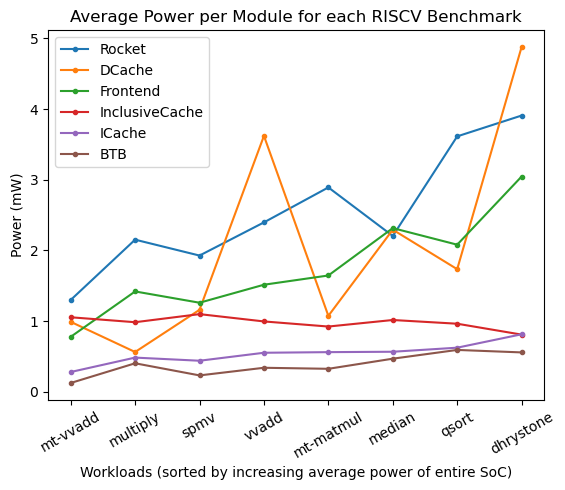

In [79]:
module_avgpwr_dict = {}
for m in module_jpower_dict:
    module_avgpwr_dict[m] = {}
    module_avgpwr_dict[m]['w_avg'] = []
    for w in workloads_sorted:
        start, end = workload_borders[w]
        module_avgpwr_dict[m]['w_avg'].append(np.mean(module_jpower_dict[m][start:end]))
    module_avgpwr_dict[m]['avg'] = np.mean(module_jpower_dict[m])

modules_sorted = [m for a,m in sorted([(module_avgpwr_dict[m]['avg'],m) for m in module_avgpwr_dict], reverse=True)]
# modules_sorted.remove('ChipTop')
# modules_sorted.remove('DigitalTop')
# # modules_sorted.remove('DCache')
# modules_sorted.remove('data_arrays_0_ext')
# modules_sorted.remove('TLDebugModuleInner')
# modules_sorted.remove('InclusiveCache')
modules = [
    # 'ChipTop',
    # 'DigitalTop',
    'Rocket',
    'DCache',
    # 'TLDebugModuleInner',
    'Frontend',
    # 'data_arrays_0_ext',
    'InclusiveCache', # L2
    # 'Scheduler', # inside L2
    # 'CSRFile',
    'ICache',
    'BTB',
    # 'SourceD',
    # 'ShiftQueue',
    # 'rf_combMem',
    # 'table_combMem',
    # 'TLB_1',
    # # 'tag_array_ext',
    # 'PTW',
    # # 'IBuf',
    # 'FPU',
    # # 'PeripheryBus_1',
    # 'ALU',
    # # 'SinkA',
    # 'Directory'
]
for i,m in enumerate(modules):
    if i >= 10: break
    plt.plot(module_avgpwr_dict[m]['w_avg'], '.-', label=m[:20])
plt.xticks(range(len(workloads_sorted)), workloads_sorted,
            rotation=30,
            horizontalalignment='center',
            verticalalignment='top')
plt.title('Average Power per Module for each RISCV Benchmark')
plt.xlabel('Workloads (sorted by increasing average power of entire SoC)')
plt.ylabel('Power (mW)')
plt.legend(loc='upper left', bbox_to_anchor=(0,1));

In [80]:
modules_sorted

['ChipTop',
 'DigitalTop',
 'Rocket',
 'DCache',
 'TLDebugModuleInner',
 'Frontend',
 'data_arrays_0_ext',
 'InclusiveCache',
 'Scheduler',
 'CSRFile',
 'ICache',
 'BTB',
 'SourceD',
 'ShiftQueue',
 'rf_combMem',
 'table_combMem',
 'TLB_1',
 'tag_array_ext',
 'PTW',
 'IBuf',
 'FPU',
 'PeripheryBus_1',
 'ALU',
 'SinkA',
 'Directory',
 'cc_dir_ext',
 'TLUART',
 'ListBuffer',
 'BankedStore',
 'TLXbar',
 'data_arrays_0_0_ext',
 'RVCExpander',
 'GenericSerializer',
 'AsyncQueueSink_1',
 'AsyncQueueSource_2',
 'AsyncQueueSink_2',
 'data_combMem_1',
 'TLToAXI4',
 'TLCacheCork',
 'MulAddRecFNPipe_1',
 'tag_array_0_ext',
 'TLAtomicAutomata_1',
 'MulDiv',
 'ram_combMem_1',
 'TLXbar_5',
 'MSHR',
 'GenericDeserializer',
 'ListBuffer_2',
 'SinkC',
 'TLXbar_2',
 'PMPChecker_2',
 'data_combMem',
 'SourceC',
 'HellaPeekingArbiter',
 'Queue_30',
 'ram_combMem_20',
 'UARTRx',
 'TLAtomicAutomata',
 'HellaCacheArbiter',
 'TLXbar_6',
 'ListBuffer_1',
 'TLPLIC',
 'next_combMem_1',
 'AsyncResetSynchronizerPr

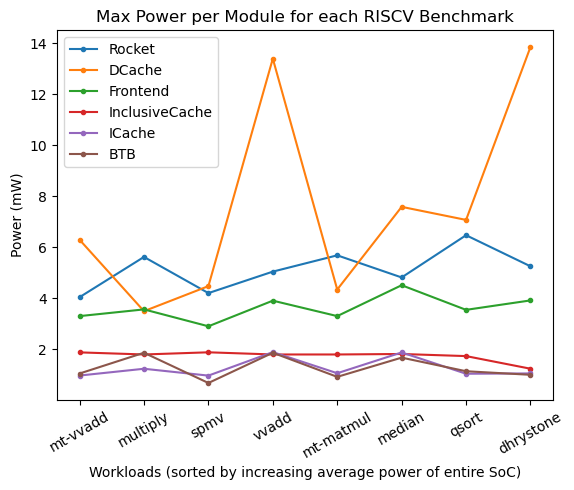

In [81]:
percentile = 98
module_avgpwr_dict = {}
for m in module_jpower_dict:
    module_avgpwr_dict[m] = {}
    module_avgpwr_dict[m]['w_avg'] = []
    for w in workloads_sorted:
        start, end = workload_borders[w]
        module_avgpwr_dict[m]['w_avg'].append(np.percentile(module_jpower_dict[m][start:end],percentile))
    module_avgpwr_dict[m]['avg'] = np.percentile(module_jpower_dict[m],percentile)

for i,m in enumerate(modules):
    if i >= 10: break
    plt.plot(module_avgpwr_dict[m]['w_avg'], '.-', label=m[:20])
plt.xticks(range(len(workloads_sorted)), workloads_sorted,
            rotation=30,
            horizontalalignment='center',
            verticalalignment='top')
plt.title('Max Power per Module for each RISCV Benchmark')
plt.xlabel('Workloads (sorted by increasing average power of entire SoC)')
plt.ylabel('Power (mW)')
plt.legend(loc='upper left', bbox_to_anchor=(0,1));

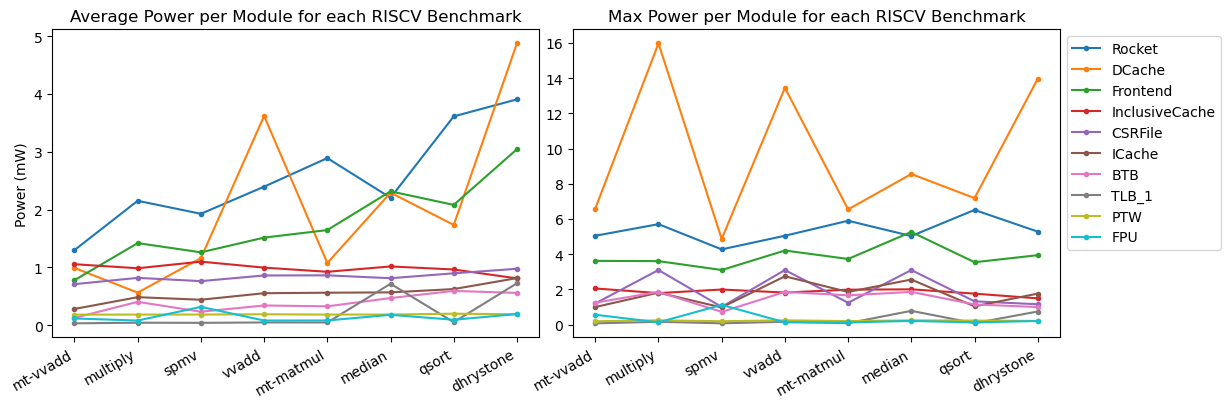

In [82]:
module_avgpwr_dict = {}
for m in module_jpower_dict:
    module_avgpwr_dict[m] = {}
    module_avgpwr_dict[m]['w_avg'] = []
    for w in workloads_sorted:
        start, end = workload_borders[w]
        module_avgpwr_dict[m]['w_avg'].append(np.mean(module_jpower_dict[m][start:end]))
    module_avgpwr_dict[m]['avg'] = np.mean(module_jpower_dict[m])

modules_sorted = [m for a,m in sorted([(module_avgpwr_dict[m]['avg'],m) for m in module_avgpwr_dict], reverse=True)]
# modules_sorted.remove('ChipTop')
# modules_sorted.remove('DigitalTop')
# # modules_sorted.remove('DCache')
# modules_sorted.remove('data_arrays_0_ext')
# modules_sorted.remove('TLDebugModuleInner')
# modules_sorted.remove('InclusiveCache')
modules = [
    # 'ChipTop',
    # 'DigitalTop',
    'Rocket',
    'DCache',
    # 'TLDebugModuleInner',
    'Frontend',
    # 'data_arrays_0_ext',
    'InclusiveCache', # L2
    # 'Scheduler', # inside L2
    'CSRFile',
    'ICache',
    'BTB',
    # 'SourceD',
    # 'ShiftQueue',
    # 'rf_combMem',
    # 'table_combMem',
    'TLB_1',
    # 'tag_array_ext',
    'PTW',
    # 'IBuf',
    'FPU',
    # 'PeripheryBus_1',
    'ALU',
    # 'SinkA',
    'Directory'
]
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(121)
for i,m in enumerate(modules):
    if i >= 10: break
    ax.plot(module_avgpwr_dict[m]['w_avg'], '.-', label=m[:20])
ax.set_xticks(range(len(workloads_sorted)), workloads_sorted,
            rotation=30,
            horizontalalignment='right',
            verticalalignment='top')
# ax.set_xlim(right=len(workloads_sorted)-0.5)
ax.set_ylabel('Power (mW)')
ax.set_title('Average Power per Module for each RISCV Benchmark')
ax = fig.add_subplot(122)
percentile = 99
module_maxpwr_dict = {}
for m in module_jpower_dict:
    module_maxpwr_dict[m] = {}
    module_maxpwr_dict[m]['w_avg'] = []
    for w in workloads_sorted:
        start, end = workload_borders[w]
        module_maxpwr_dict[m]['w_avg'].append(np.percentile(module_jpower_dict[m][start:end],percentile))
    module_maxpwr_dict[m]['avg'] = np.percentile(module_jpower_dict[m],percentile)
for i,m in enumerate(modules):
    if i >= 10: break
    ax.plot(module_maxpwr_dict[m]['w_avg'], '.-', label=m[:20])
ax.set_xticks(range(len(workloads_sorted)), workloads_sorted,
            rotation=30,
            horizontalalignment='right',
            verticalalignment='top')
ax.set_title('Max Power per Module for each RISCV Benchmark')

ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.subplots_adjust(wspace=0.07);

''

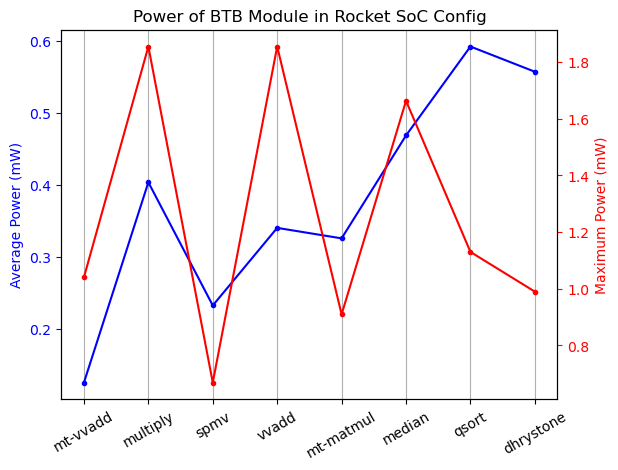

In [83]:
m = 'BTB'

# workloads_sorted = [w for p,w in sorted(zip(module_avgpwr_dict[m]['w_avg'], workloads_sorted), reverse=True)]
power_sorted = [p for p,w in sorted(zip(module_avgpwr_dict[m]['w_avg'], workloads_sorted), reverse=True)]
module_avgpwr_dict[m]['w'] = []
module_maxpwr_dict[m]['w'] = []
for w in workloads_sorted:
    start, end = workload_borders[w]
    module_avgpwr_dict[m]['w'].append(np.mean(module_jpower_dict[m][start:end]))
    module_maxpwr_dict[m]['w'].append(np.percentile(module_jpower_dict[m][start:end],98))

ax = plt.subplot()
plt.xticks(range(len(workloads_sorted)), workloads_sorted,
            rotation=30,
            horizontalalignment='center',
            verticalalignment='top')
plt.grid(axis='x')
plt.plot(module_avgpwr_dict[m]['w'], 'b.-', label='Average Power')
ax.set_ylabel('Average Power (mW)', color='b')
ax.tick_params(colors='b', axis='y', which='both')


ax = ax.twinx()
ax.plot(module_maxpwr_dict[m]['w'], 'r.-', label='Max Power')
ax.set_ylabel('Maximum Power (mW)', color='r')
ax.tick_params(colors='r', axis='y', which='both')
plt.title(f"Power of {m} Module in Rocket SoC Config")
# plt.legend(['Max','Avg'])#loc='upper left', bbox_to_anchor=(1,1))
;

In [84]:
workload_borders

{'dhrystone': (0, 3092),
 'median': (3092, 3569),
 'mt-matmul': (3569, 4420),
 'mt-vvadd': (4420, 6316),
 'multiply': (6316, 6609),
 'qsort': (6609, 8738),
 'spmv': (8738, 11797),
 'vvadd': (11797, 12220)}

In [85]:
exec(open(f"{power_analysis_dir}/util.py").read())
index_T = get_uniform_indexes(toggles.shape[0],train_size=0.2)
X_train_T, X_test_T, y_train_T, y_test_T= get_train_test_split(toggles,jpower,indexes=index_T)

In [86]:
exec(open(f"{power_analysis_dir}/util.py").read())
wb_train, wb_test = get_train_test_workload_borders(workload_borders, index_T)

In [87]:
# for now skip modules with max power < 0.1
modules = list(module_jpower_dict.keys())
for m in modules:
    if max(module_jpower_dict[m]) < 0.1:
        # print(f"Removing module {m}")
        del module_toggles_dict[m]
        del module_jpower_dict[m]
len(module_jpower_dict)

44

(7000.0, 9000.0)

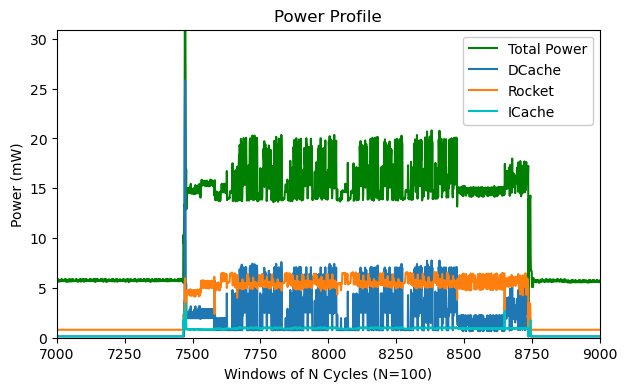

In [106]:

# fig = plt.figure(figsize=(7,4))
# plt.plot(jpower,'g',  label='Total Power')
plot_power(jpower, labels=['Total Power'], fig=plt.figure(figsize=(7,4)))
# plt.ylim(top=max(jpower))
colors=['tab:blue','tab:orange','c', 'm']
jpower_sum = None
for i,module in enumerate(['DCache','Rocket','ICache']):
    plt.plot(module_jpower_dict[module], label=module, color=colors[i])
    if jpower_sum is None: jpower_sum = module_jpower_dict[module]
    else: jpower_sum = np.sum([jpower_sum, module_jpower_dict[module]], axis=0)
# plt.plot(jpower_sum, 'r--', label='Sum of Sub-Modules')
plt.legend(loc='upper right', framealpha=1)
plt.ylim(top=max(module_jpower_dict['DCache']))
plt.xlim((7000,9000))

R^2 = 0.99, NRMSE = 4%


(0.0, 53.58758189832)

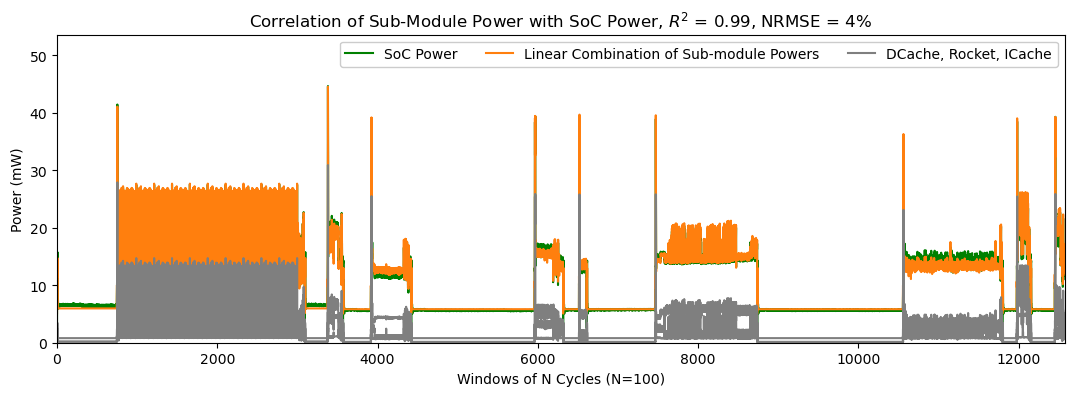

In [105]:
# plot_power(module_jpower_dict['Rocket'], labels=['Rocket'])
y = module_jpower_dict['ChipTop']
submodules = [
    'DCache',
    'Rocket',
    'ICache',
]
X = np.ndarray((len(y),0))
for module in submodules:
    X = np.concatenate((X,np.array(module_jpower_dict[module]).reshape(-1,1)), axis=1)
ret_val = fit(X,y)
ret_dict = predict(X,y,ret_val)
plot_power(y, ret_dict['y_pred'], 
           labels=['SoC Power', 'Linear Combination of Sub-module Powers'],
           title='Correlation of Sub-Module Power with SoC Power',
           y_first=False)

for module in submodules:
    plt.plot(module_jpower_dict[module], 'tab:gray', label=', '.join(submodules))
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], 
            loc='upper right', bbox_to_anchor=(1,1), ncol=3, 
            frameon=True, framealpha=1)
plt.ylim(top=max(y)*1.2)

(7000.0, 9000.0)

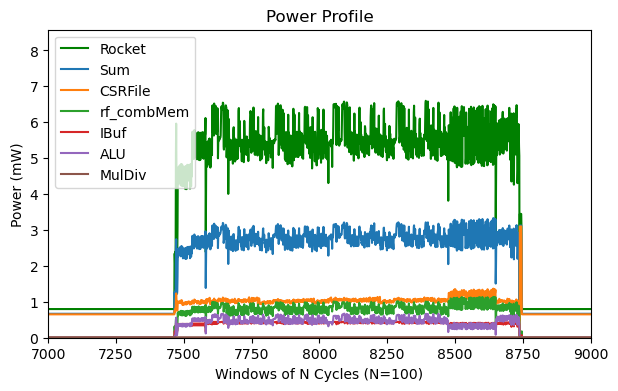

In [60]:
plot_power(module_jpower_dict['Rocket'], labels=['Rocket'], fig=plt.figure(figsize=(7,4)))
rocket_modules = [
    # 'Rocket',
    'CSRFile',
    'rf_combMem',
    'IBuf',
    
    # 'BreakpointUnit',
    'ALU',
    'MulDiv'
]
rocket_jpower_sum = None
for module in rocket_modules:
    
    if rocket_jpower_sum is None:
        rocket_jpower_sum = module_jpower_dict[module]
    else: rocket_jpower_sum = np.sum((rocket_jpower_sum,module_jpower_dict[module]),axis=0)
plt.plot(rocket_jpower_sum, label='Sum')
for module in rocket_modules:
    plt.plot(module_jpower_dict[module], label=module)
plt.legend(loc='upper left')
plt.xlim((7000,9000))

R^2 = 1.0, NRMSE = 4%


(0.0, 7.916065495799999)

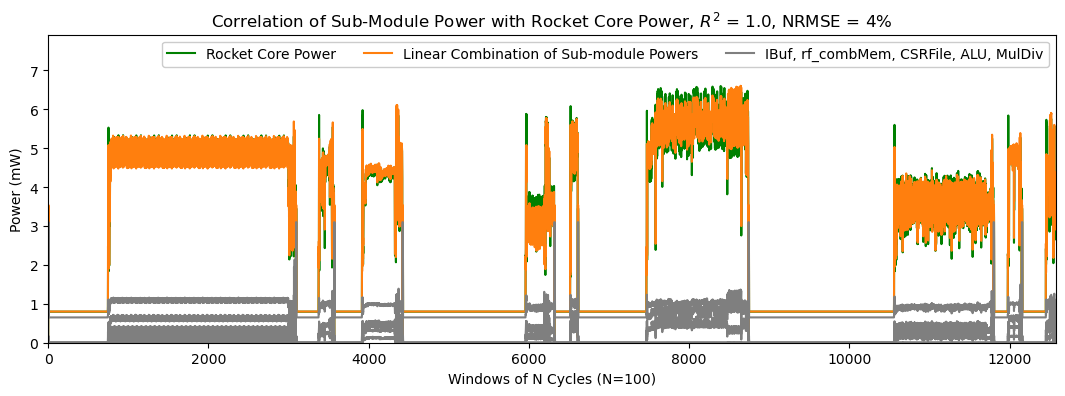

In [55]:
# plot_power(module_jpower_dict['Rocket'], labels=['Rocket'])
y = module_jpower_dict['Rocket']
rocket_modules = [
    # 'Rocket',
    'IBuf',
    'rf_combMem',
    'CSRFile',
    # 'BreakpointUnit',
    'ALU',
    'MulDiv'
]
X = np.ndarray((len(y),0))
# print(module_jpower_dict[module].reshape(-1,1).shape)
for module in rocket_modules:
    X = np.concatenate((X,np.array(module_jpower_dict[module]).reshape(-1,1)), axis=1)
ret_val = fit(X,y)
ret_dict = predict(X,y,ret_val)
plot_power(y, ret_dict['y_pred'], 
           labels=['Rocket Core Power', 'Linear Combination of Sub-module Powers'],
           title='Correlation of Sub-Module Power with Rocket Core Power',
           y_first=False)

for module in rocket_modules:
    plt.plot(module_jpower_dict[module], 'tab:gray', label=', '.join(rocket_modules))
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], 
            loc='upper right', bbox_to_anchor=(1,1), ncol=3, 
            frameon=True, framealpha=1)
plt.ylim(top=max(y)*1.2)

In [16]:
jpower_sum

array([ 0.73551275,  9.79705381,  9.79705381, ..., 11.21018533,
       11.15333513, 11.76277117])

In [17]:
jpower.size, module_jpower_dict[module].size

(7113, 12573)

In [31]:
module_jpower_dict[module]

array([0.36894755, 3.94181837, 3.94181837, ..., 4.38354332, 4.3004221 ,
       2.34933023])

### Fit linear model to each module's data

Text(0, 0.5, 'Power (mW)')

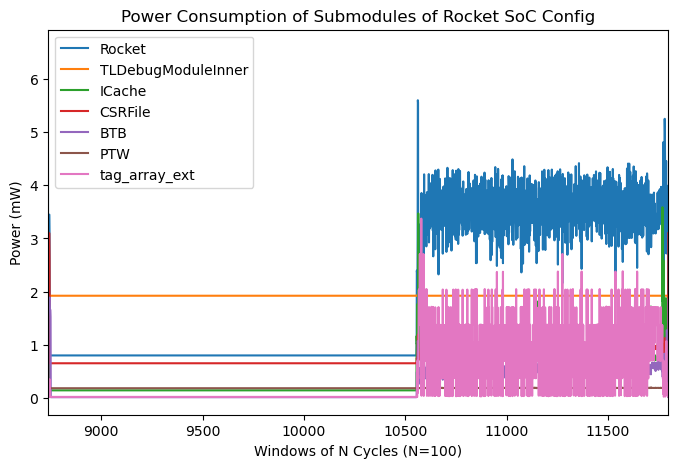

In [47]:
plt.figure(figsize=(8,5))
i = 6
plt.xlim(workload_borders[my_workloads[i]])
for module in ['Rocket',
               'TLDebugModuleInner',
               'ICache',
               'CSRFile',
               'BTB',
               'PTW',
               'tag_array_ext',
               ]:
    plt.plot(module_jpower_dict[module], label=module) #, linewidth=3)
# plt.xlim(0,35000)
plt.legend(loc='upper left')#, bbox_to_anchor=(1,1))
plt.xlabel(f'Windows of N Cycles (N={N_CYCLES})')
plt.title('Power Consumption of Submodules of Rocket SoC Config')
plt.ylabel('Power (mW)')
# w = 'median'
# plt.xlim(workload_borders[w],workload_borders[my_workloads[my_workloads.index(w)+1]])

In [48]:
exec(open("/tools/C/nayiri/power/power-analysis/util.py").read())
i = 0
module_regr_dict = {}
for module in module_toggles_dict:
    m_toggles = module_toggles_dict[module]
    m_jpower = module_jpower_dict[module]
    # m_toggles, m_jpower = get_workload_toggles_jpower(m_toggles, m_jpower, list(workload_borders.values()), 3)
    if m_toggles.shape[0] != len(m_jpower): 
        print(f"Skipping {module}: {m_toggles.shape[0]} toggles vs {len(m_jpower)} jpower")
        continue

    print(i, module.ljust(22), end='  ')

    # APOLLO
    m_X_train, m_X_test, m_y_train, m_y_test = get_train_test_split(m_toggles,m_jpower,indexes=index_T)
    regr_mcp, _,_ = fit(m_X_train, m_y_train,
                    alpha=0.001, # alpha=0.005 gives best accuracy but ~50 signals
                    gamma=3.0,
                    type='mcp', verbose=False)
    indexes_mcp = [i for i,c in enumerate(regr_mcp.coef_) if c > 0]
    m_X_train_mcp = m_X_train[:,indexes_mcp]
    m_X_test_mcp = m_X_test[:,indexes_mcp]

    if len(indexes_mcp) == 0: 
        print(f"WARNING: MCP pruned away all features in module {module}")
        continue

    regr, r2, nrmse = fit(m_X_train_mcp, m_y_train,
                          type='ridgecv',
                          return_r2=True, return_nrmse=True,
                          verbose=False)
    ret_dict = predict(m_X_test_mcp,m_y_test,regr)

    module_regr_dict[module] = {}
    module_regr_dict[module]['regr'] = regr
    # module_regr_dict[module]['X_train'] = X_train
    module_regr_dict[module]['X_test'] = m_X_test_mcp
    module_regr_dict[module]['y_test'] = m_y_test
    module_regr_dict[module]['y_pred'] = ret_dict['y_pred']
    module_regr_dict[module]['r2'] = ret_dict['r2']
    module_regr_dict[module]['nrmse'] = ret_dict['nrmse']
    i += 1
    # if i > 30: break


0 TLDebugModuleInner      R^2 = 0.0, NRMSE = 2%
R^2 = 0.0, NRMSE = 3%
1 CSRFile                 R^2 = 0.59, NRMSE = 19%
R^2 = 0.56, NRMSE = 19%
2 Rocket                  R^2 = 0.99, NRMSE = 7%
R^2 = 0.99, NRMSE = 8%
3 data_arrays_0_ext       R^2 = 0.84, NRMSE = 71%
R^2 = 0.84, NRMSE = 70%
4 ICache                  R^2 = 0.97, NRMSE = 14%
R^2 = 0.85, NRMSE = 31%
5 Frontend                R^2 = 0.95, NRMSE = 17%
R^2 = 0.95, NRMSE = 18%
6 SourceD                 R^2 = 0.95, NRMSE = 9%
R^2 = 0.94, NRMSE = 9%
7 table_combMem           R^2 = 0.88, NRMSE = 41%
R^2 = 0.85, NRMSE = 46%
8 ShiftQueue              R^2 = 0.99, NRMSE = 7%
R^2 = 0.99, NRMSE = 8%
9 rf_combMem              R^2 = 0.98, NRMSE = 15%
R^2 = 0.98, NRMSE = 16%
10 PTW                     R^2 = 0.77, NRMSE = 3%
R^2 = 0.76, NRMSE = 3%
11 ChipTop                 R^2 = 0.82, NRMSE = 23%
R^2 = 0.82, NRMSE = 23%
12 BTB                     R^2 = 0.91, NRMSE = 32%
R^2 = 0.89, NRMSE = 35%
13 DCache                  R^2 = 0.96, NRMSE = 

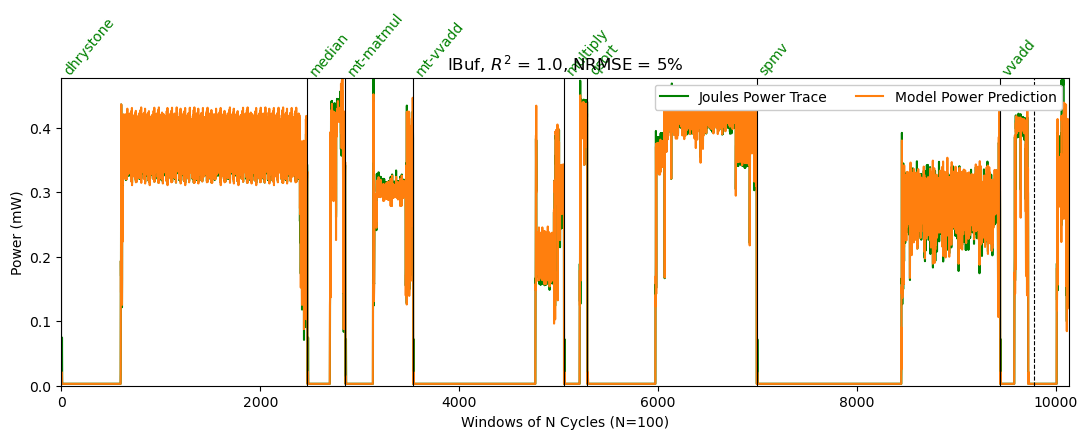

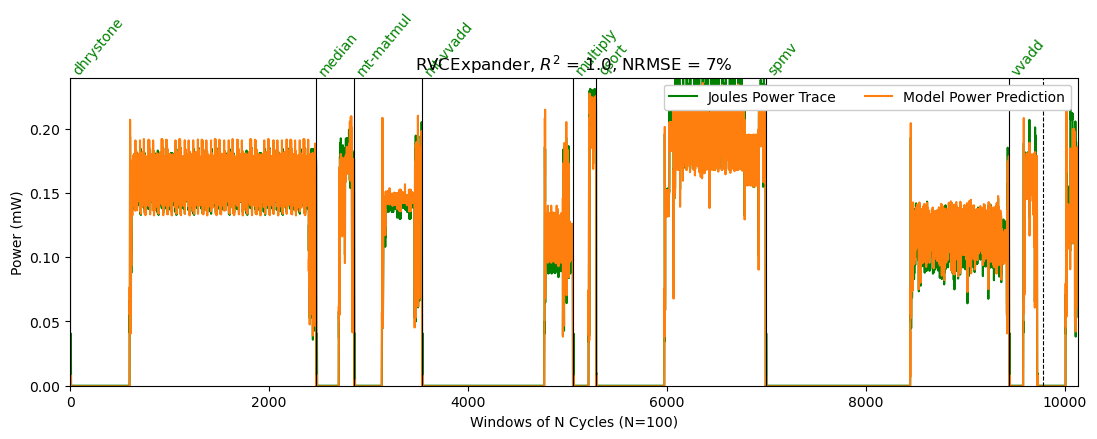

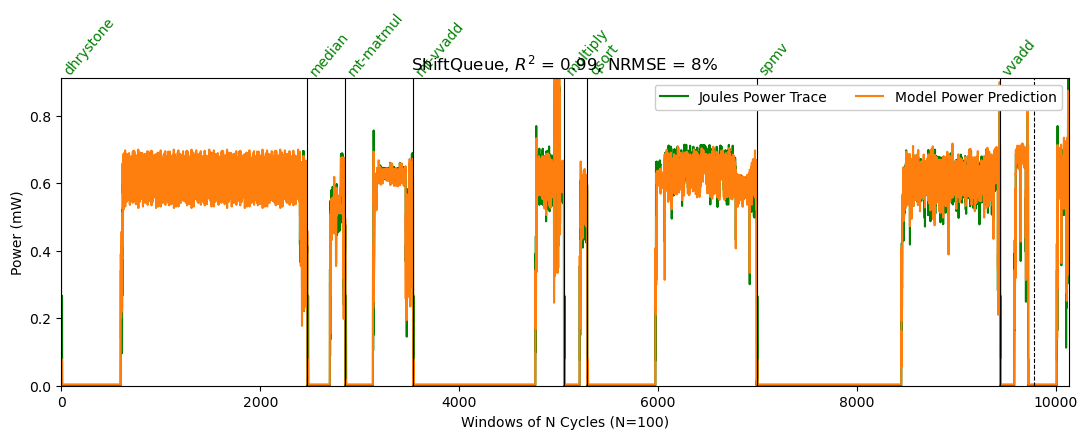

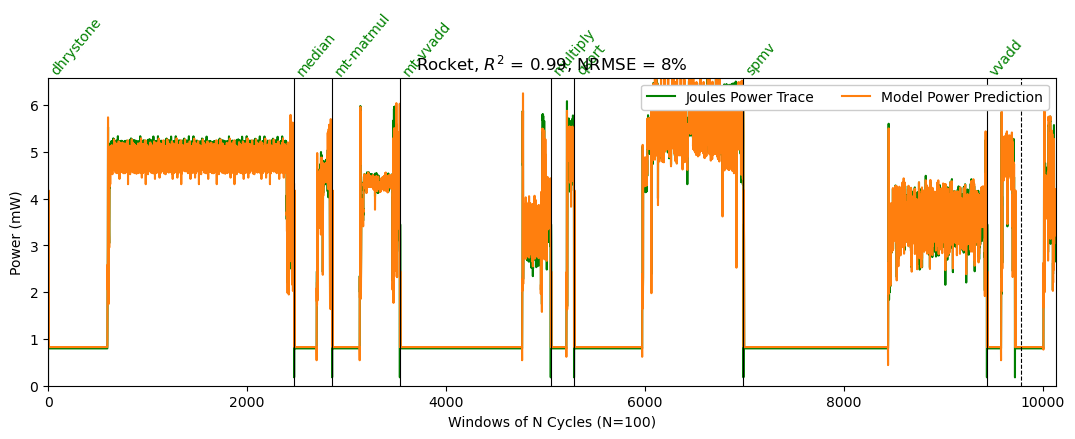

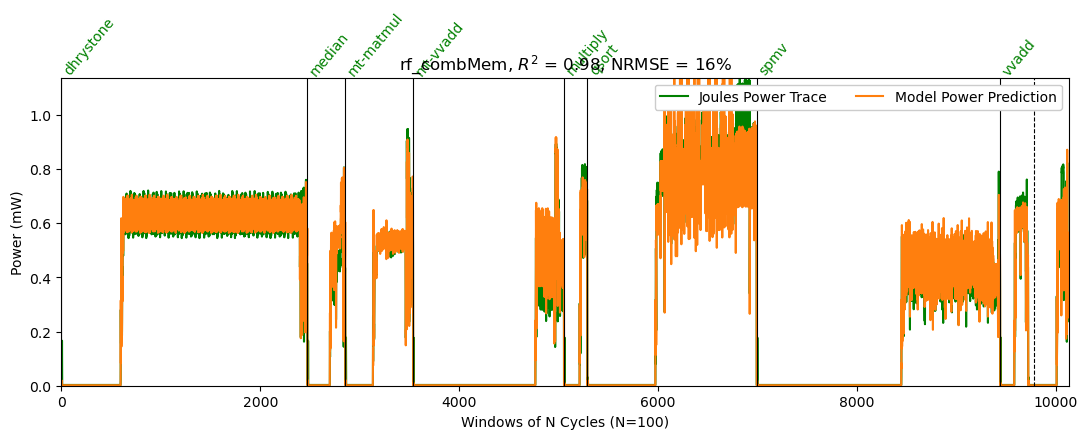

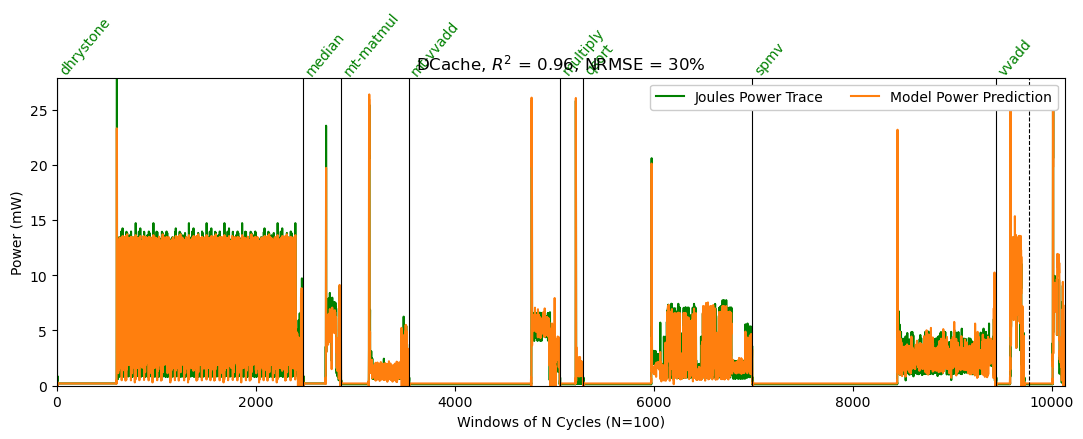

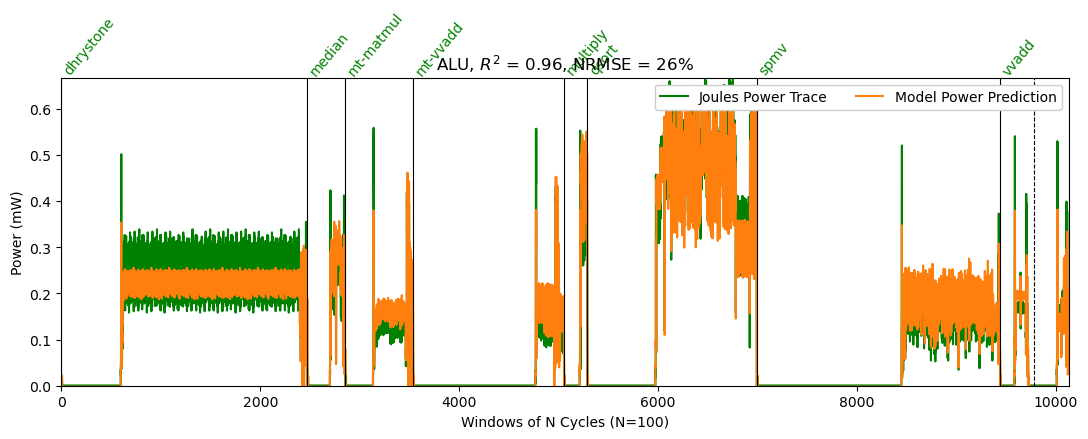

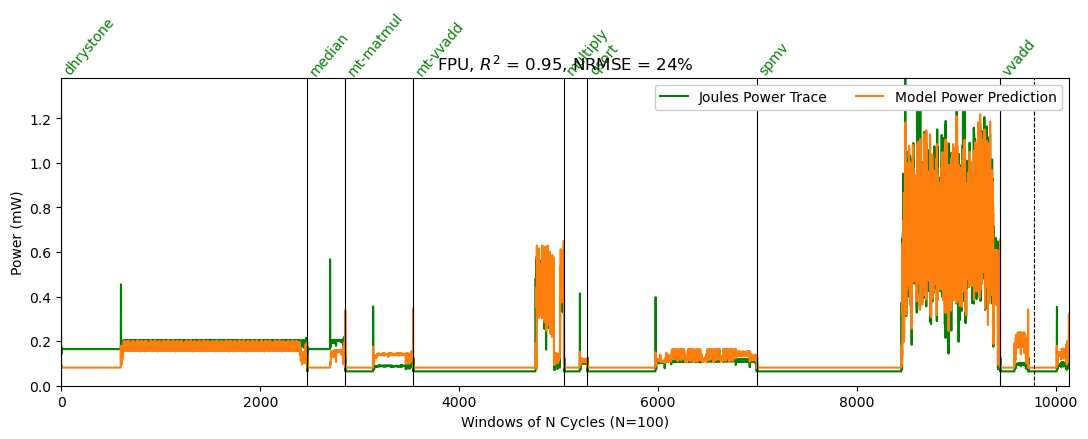

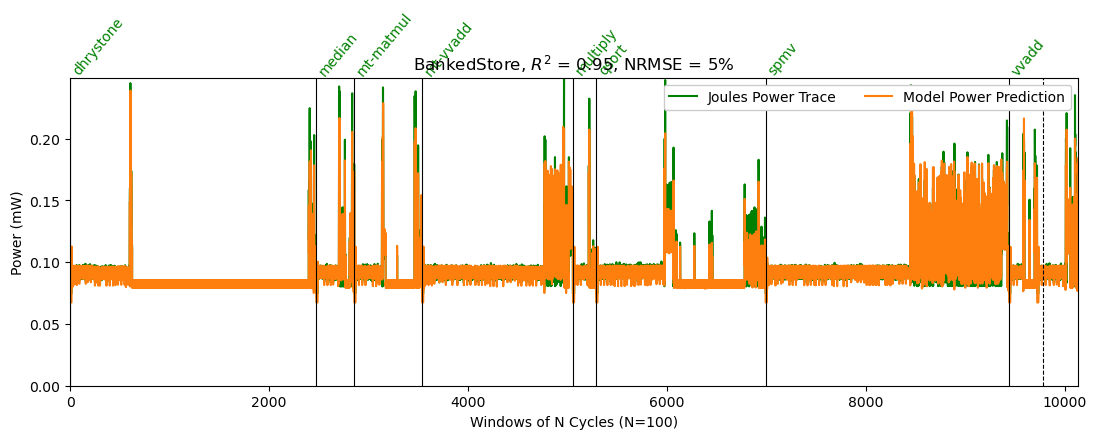

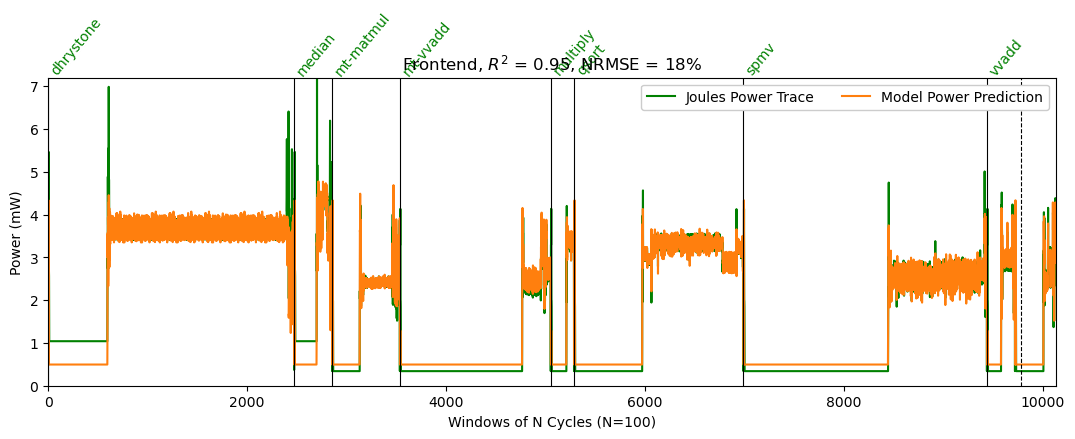

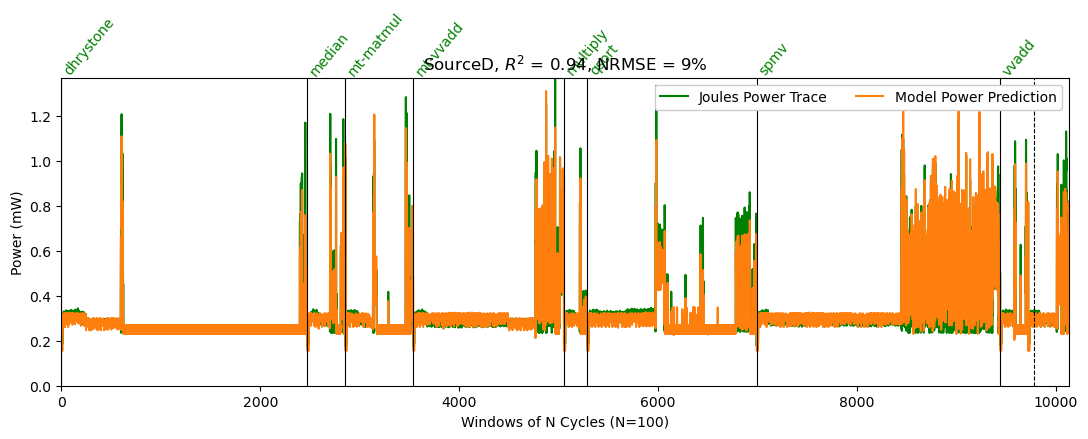

In [49]:
exec(open("/tools/C/nayiri/power/power-analysis/util.py").read())

r2_modules = sorted(zip([module_regr_dict[m]['r2'] for m in module_regr_dict], module_regr_dict.keys()))
r2_modules.reverse()
i = 0
for _, module in r2_modules:
    if 'regr' not in module_regr_dict[module]: continue
    regr = module_regr_dict[module]['regr']
    m_y_test = module_regr_dict[module]['y_test']

    plot_power(m_y_test, module_regr_dict[module]['y_pred'],
                workload_borders=wb_test, 
                y_first=False, title=module)
    plt.ylim(0,max(max(m_y_test), 0.1))
    w_idx = 1
    # plt.xlim(workload_borders[my_workloads[w_idx]], workload_borders[my_workloads[w_idx+1]])
    # plt.xlim(left=4000)
    i += 1
    if i > 10: break
    # break


In [50]:
exec(open("/tools/C/nayiri/power/power-analysis/util.py").read())
module_powers = np.ndarray((len(y_test_T),0))

for module in module_jpower_dict:
    if 'regr' not in module_regr_dict[module]: continue
    regr = module_regr_dict[module]['regr']

    X_test = module_regr_dict[module]['X_test']
    m_y_test = module_regr_dict[module]['y_test']
    m_power_pred = module_regr_dict[module]['y_pred']

    length = module_powers.shape[0]
    i = length
    while i <= len(m_power_pred):
        module_powers = np.concatenate((module_powers,
                                        m_power_pred[i-length:i].reshape(length,-1)),
                                        axis=1)
        i += length


R^2 = 0.9, NRMSE = 17%


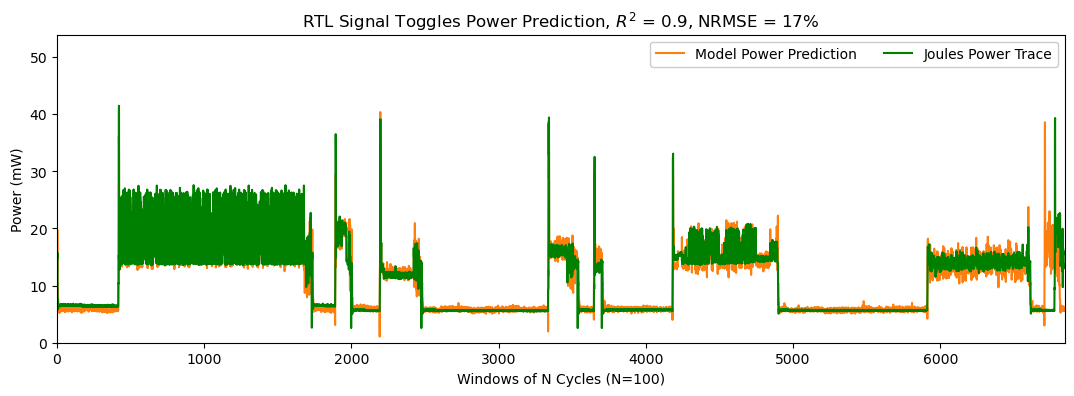

In [51]:
exec(open("/tools/C/nayiri/power/power-analysis/util.py").read())

final_indexes = get_uniform_indexes(len(y_test_T), train_size=0.3)
final_X_train, final_X_test, final_y_train, final_y_test = get_train_test_split(module_powers,y_test_T, 
                                                            indexes=final_indexes)
_, final_wb_test = get_train_test_workload_borders(wb_test, final_indexes)
regr_ssxy = fit(final_X_train, final_y_train,
            verbose=False)
ret_dict = predict(final_X_test,final_y_test,regr_ssxy)
plot_power(final_y_test,ret_dict['y_pred'])

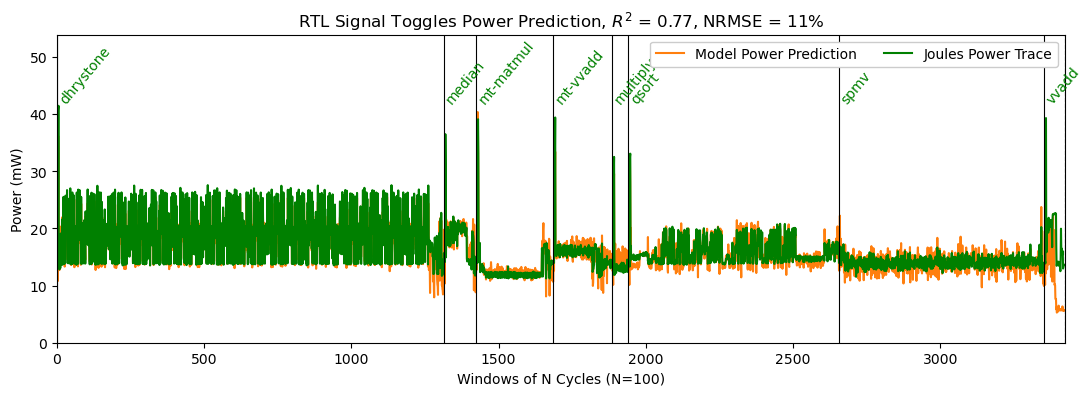

In [52]:
cutoff = np.percentile(final_y_test, 50)
idx_jpower_percentile = [(i,p) for i,p in enumerate(final_y_test) if p > cutoff]
idx_percentile = [i for i,_ in idx_jpower_percentile]
wb_percentile, _ = get_train_test_workload_borders(final_wb_test, idx_percentile)
plot_power([p for _,p in idx_jpower_percentile], ret_dict['y_pred'][idx_percentile], workload_borders=wb_percentile)

In [53]:
rocket = 'RocketConfig'
boom = 'SmallBoomConfig'

In [54]:
graphs = {}
for rtl in [rocket, boom]:
    g = nx.DiGraph()

    top = 'chiptop' # needs to be lowercase

    tmh = {}
    tmh_file = f"{vlsi_dir}/generated-src/chipyard.TestHarness.{rtl}/top_module_hierarchy.json"
    with open(tmh_file, 'r') as f:
        tmh = json.load(f)

    # inst_gnodes_dict = {}

    root = tmh['instance_name']
    # only keep DigitalTop (throw out generic IO cells)
    children = [i for i in tmh['instances'] if i['module_name'] == 'DigitalTop']
    parent_children = [(root, children)]
    g.add_node(root, module_name=tmh['module_name'])

    while parent_children:
        parent, children = parent_children.pop()
        for child_dict in children:
            child = child_dict['instance_name']
            child_path = parent+'/'+child

            g.add_node(child_path, module_name=child_dict['module_name'])
            g.add_edge(parent, child_path)

            parent_children.append((child_path, child_dict['instances']))
    print(g)
    print('Graph is a tree?', nx.is_tree(g))
    graphs[rtl] = g.copy()

DiGraph with 758 nodes and 757 edges
Graph is a tree? True
DiGraph with 962 nodes and 961 edges
Graph is a tree? True


In [55]:
rocket_modules = {m for n,m in graphs[rocket].nodes(data='module_name')}
boom_modules   = {m for n,m in graphs[boom].nodes(data='module_name')}
print(f"Rocket-only modules: {len(rocket_modules - boom_modules)}")
print(f"BOOM-only modules: {len(boom_modules - rocket_modules)}")
print(f"Both: {len(rocket_modules & boom_modules)}")

Rocket-only modules: 29
BOOM-only modules: 178
Both: 346


In [56]:
print(boom_modules - rocket_modules)

{'FAMicroBTBBranchPredictorBank', 'rob_debug_inst_mem_0_ext', 'BranchKillableQueue_4', 'hi_us_0_ext', 'FPUUnit', 'RenameBusyTable', 'OptimizationBarrier_36', 'PipelinedMulUnit', 'BoomWritebackUnit', 'MaxPeriodFibonacciLFSR_3', 'sdq_combMem', 'ghist_1', 'array_0_0_0_ext', 'data_ext', 'BranchKillableQueue', 'RegisterReadDecode_2', 'TLB', 'LSU', 'IssueUnitCollapsing_1', 'ebtb_ext', 'Rob', 'Mul54', 'FetchBuffer', 'table_2', 'MemAddrCalcUnit', 'TageTable_4', 'BranchDecode', 'ram_combMem_27', 'table_3', 'TageTable', 'array_3_0_0', 'array_0_0_0', 'RenameStage_1', 'LoopBranchPredictorBank', 'array_1_0_0', 'Arbiter_5', 'Queue_41', 'table_0_ext', 'IntToFPUnit', 'BranchPredictor', 'Queue_43', 'RenameStage', 'l2_tlb_ram_0', 'UOPCodeFDivDecoder', 'ram_combMem_31', 'Queue_38', 'Arbiter_20', 'ram_combMem_28', 'table_ext', 'RegisterFileSynthesizable_1', 'FDivSqrtUnit', 'UOPCodeFPUDecoder', 'FMADecoder', 'RegisterReadDecode_1', 'BTBBranchPredictorBank', 'RenameBusyTable_1', 'hi_us_4', 'lb_combMem', 'lo

In [14]:
# exec(open("/tools/C/nayiri/power/power-analysis/util.py").read())

# cutoff = 0.10 * np.percentile(final_y_test, 10)

# r2_modules = sorted(zip([module_regr_dict[m]['r2'] for m in module_regr_dict], module_regr_dict.keys()))
# r2_modules.reverse()
# i = 0
# for module in module_regr_dict[module]:
#     regr = module_regr_dict[module]['regr']
#     m_y_test = module_regr_dict[module]['y_test']
#     if max(m_y_test) < cutoff: continue

#     # ret_dict = predict(module_regr_dict[module]['X_test'], m_y_test, regr)
#     m_y_test_norm = [100*my/y for my,y in zip(m_y_test,y_test_T)]
    
#     plot_power(m_y_test,
#                 workload_borders=wb_test, 
#                 y_first=False, title=module)
#     plt.plot(y_test_T,'r')
#     plt.ylim(top=max(y_test_T))
    
#     w_idx = 1
#     i += 1
#     # if i > 10: break
#     # break


<string>:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


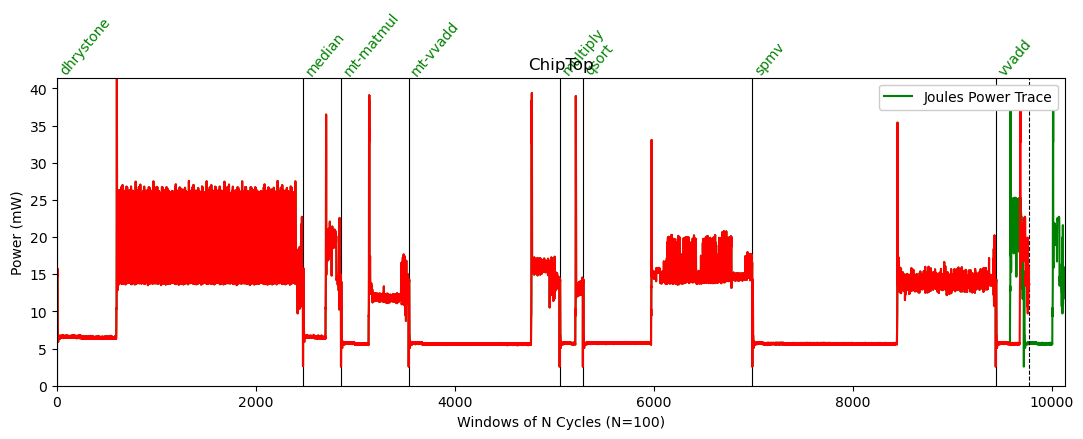

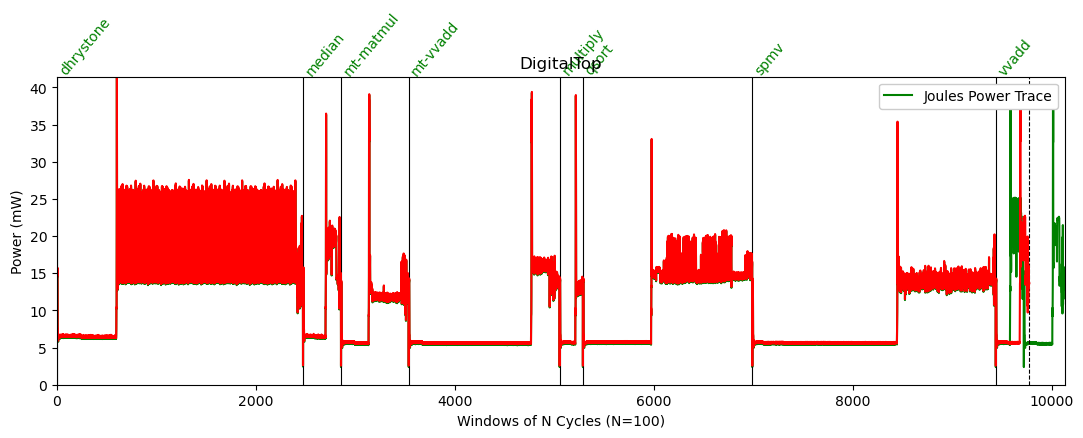

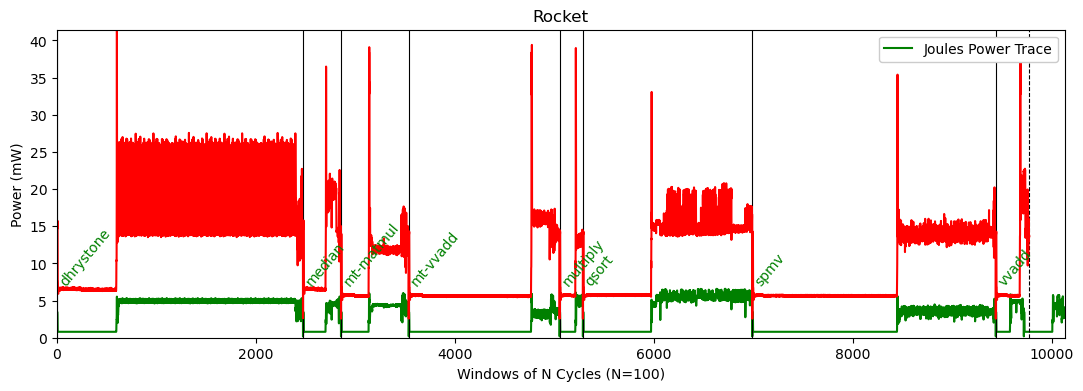

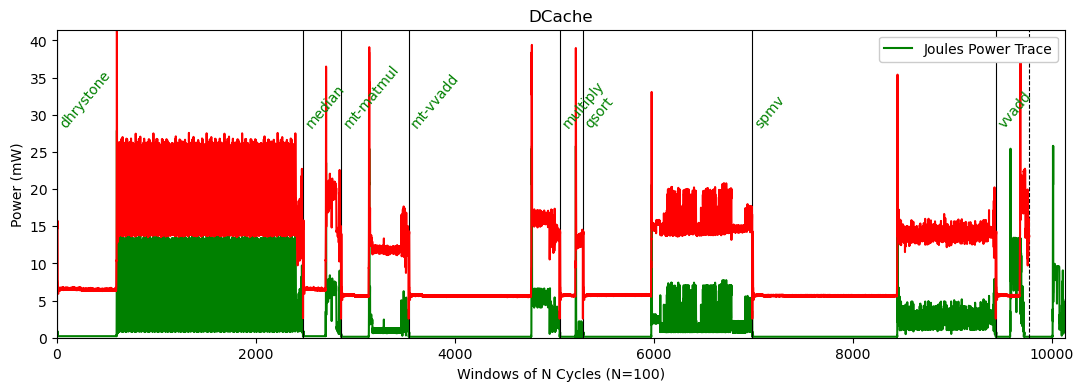

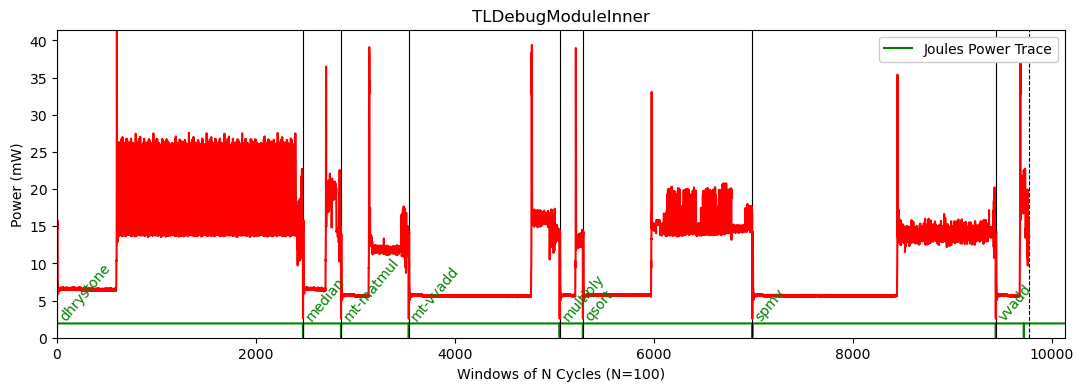

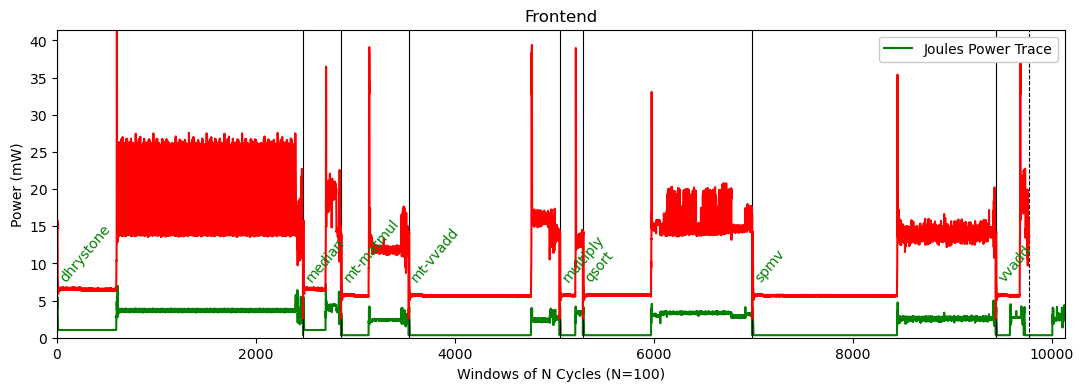

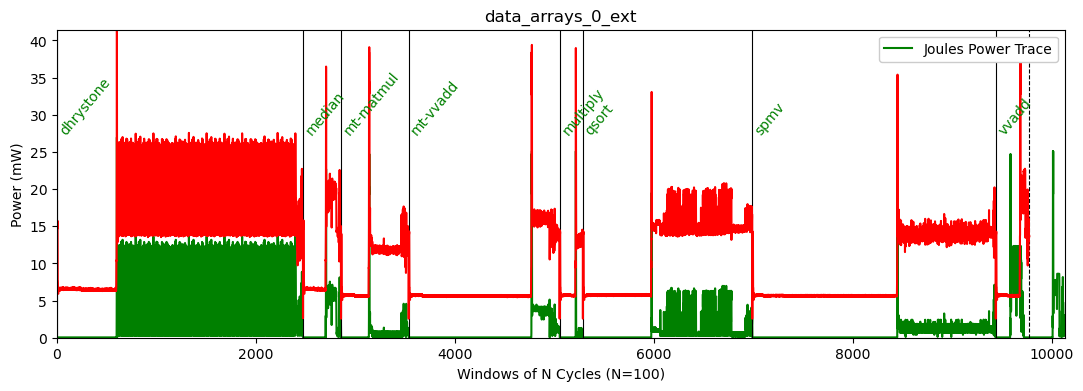

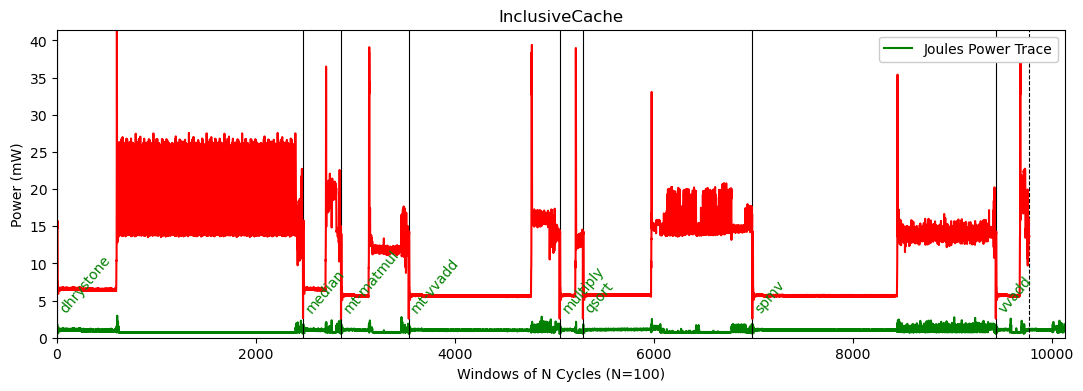

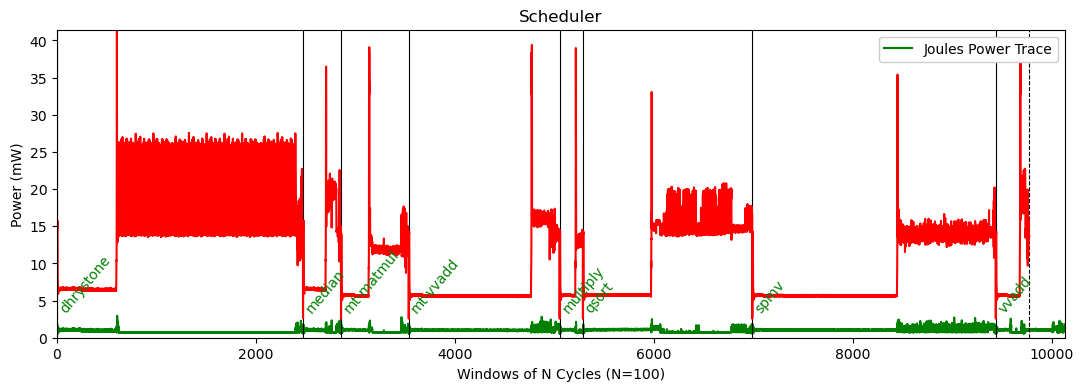

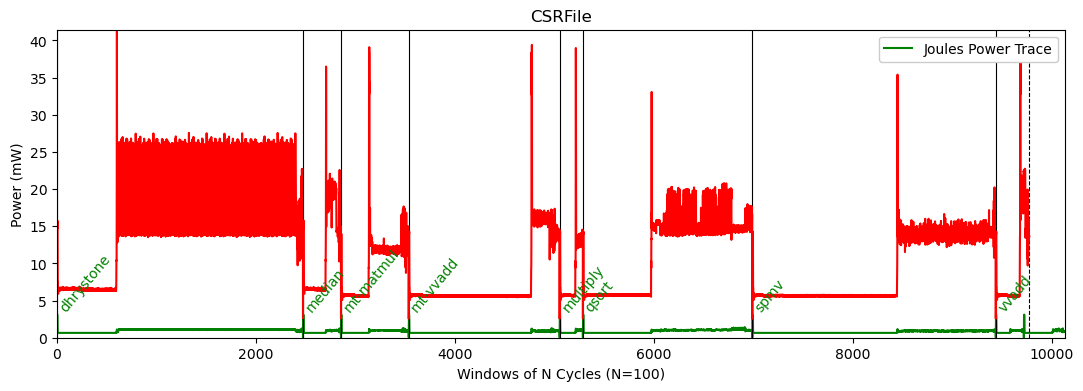

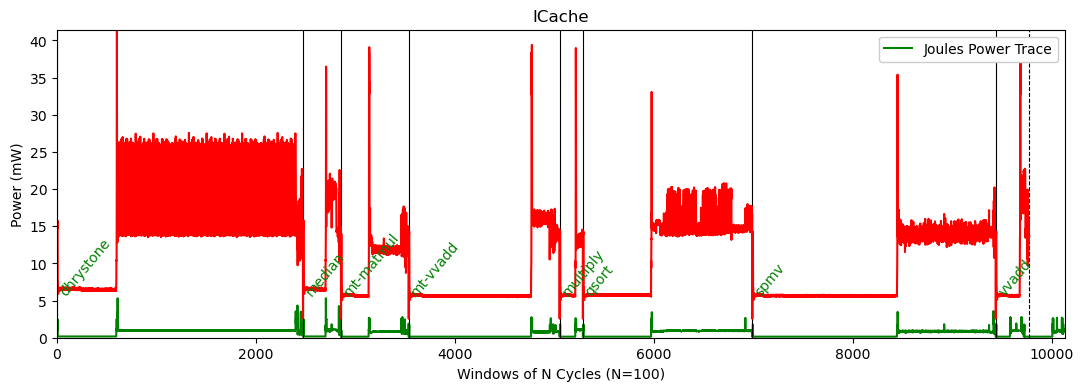

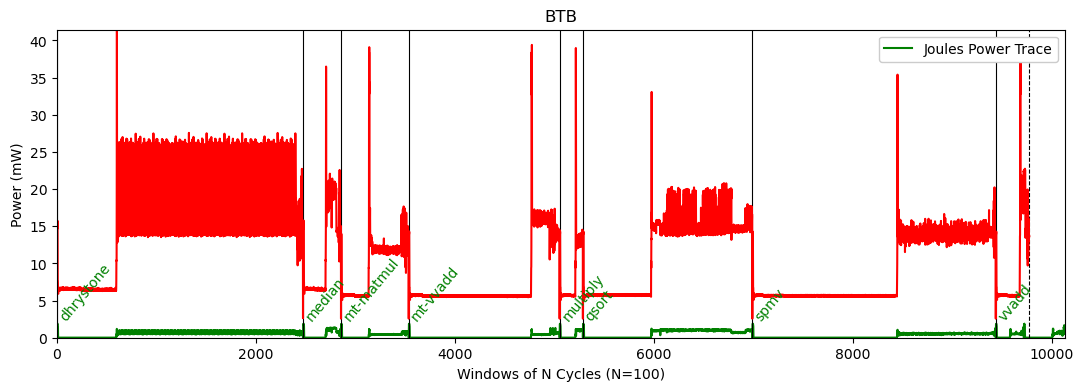

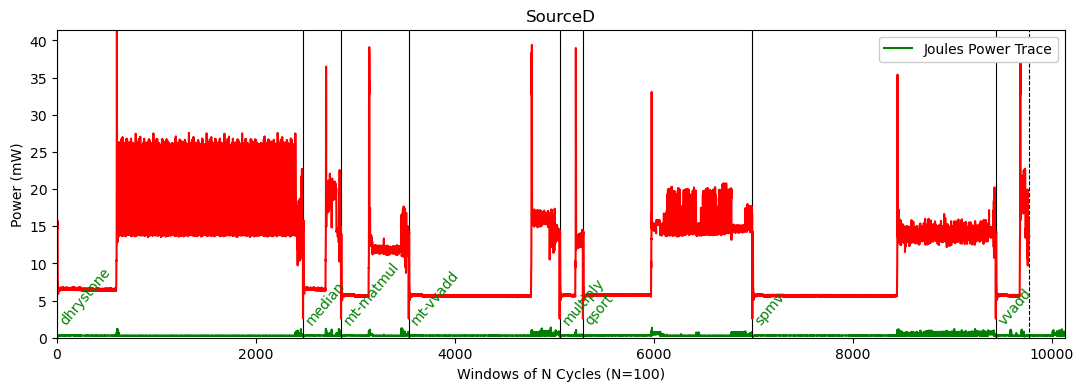

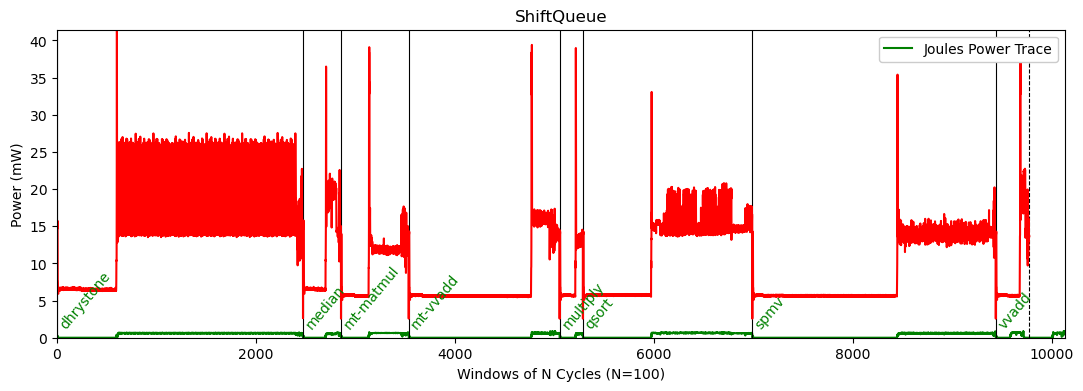

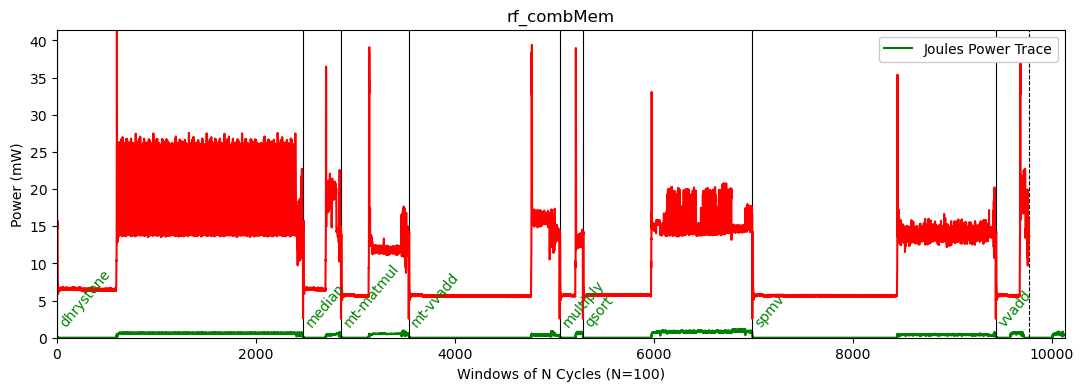

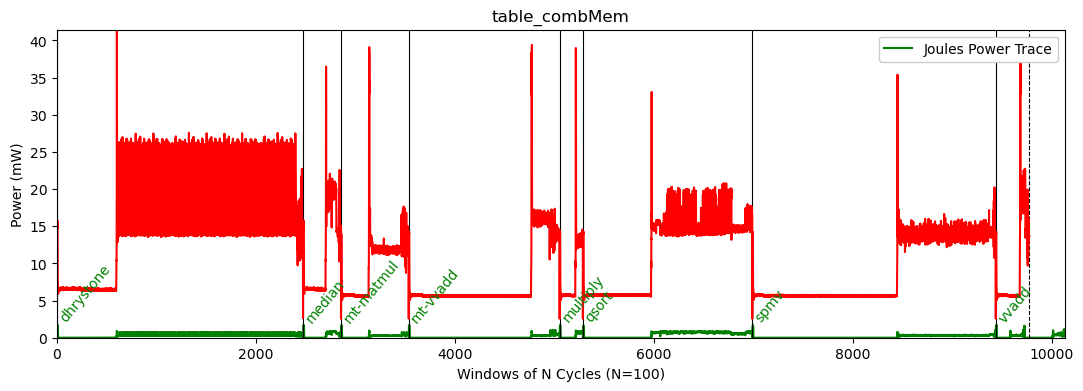

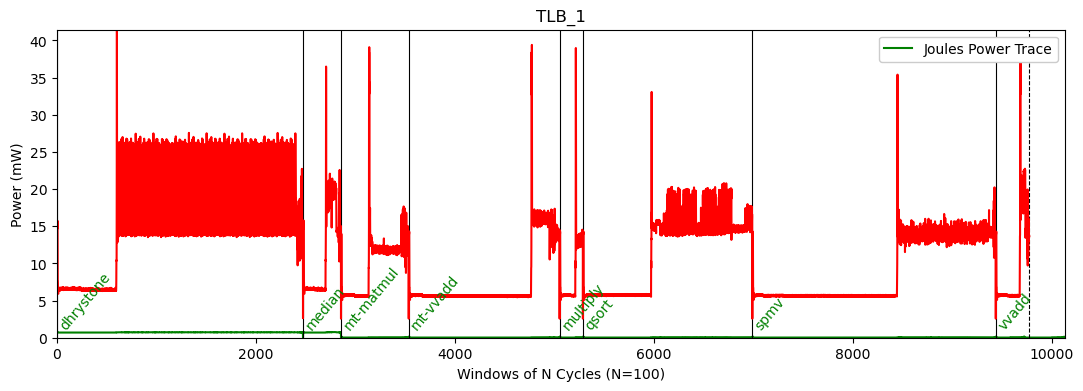

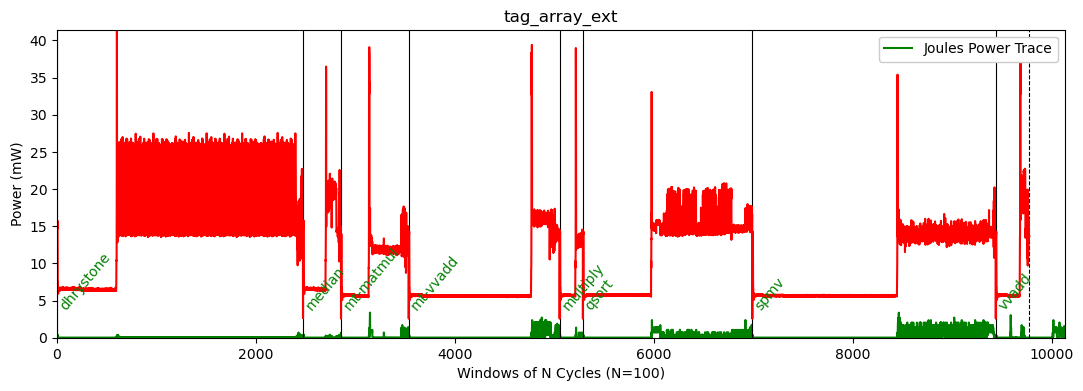

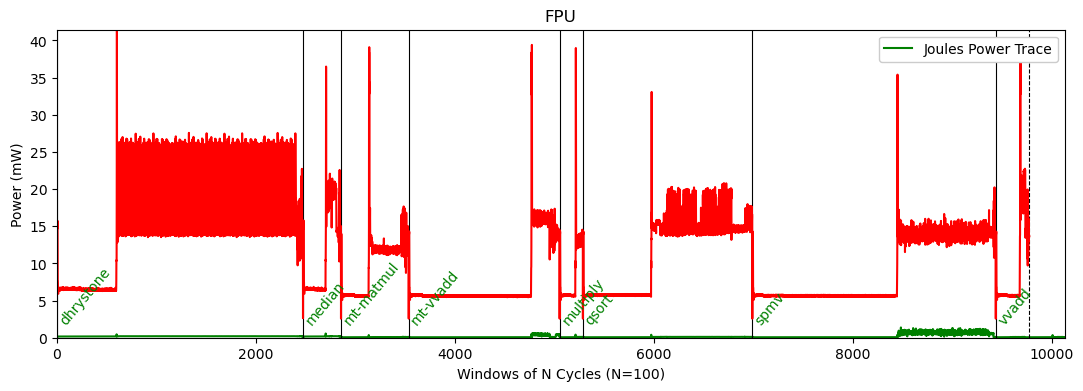

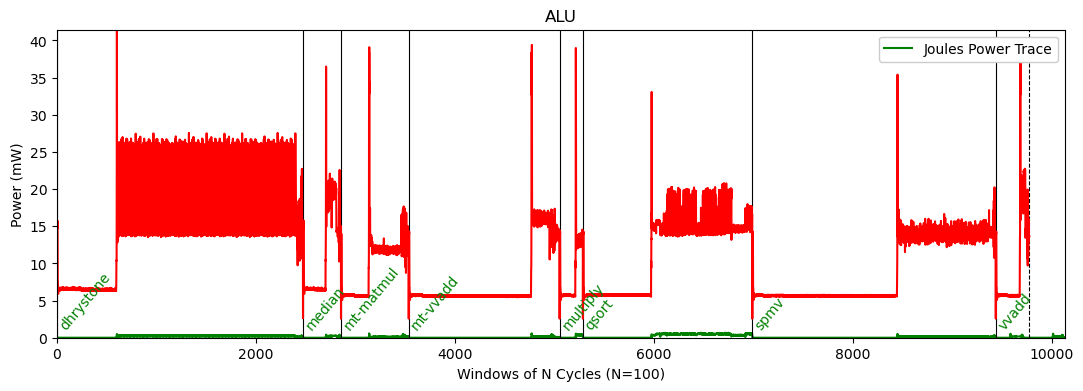

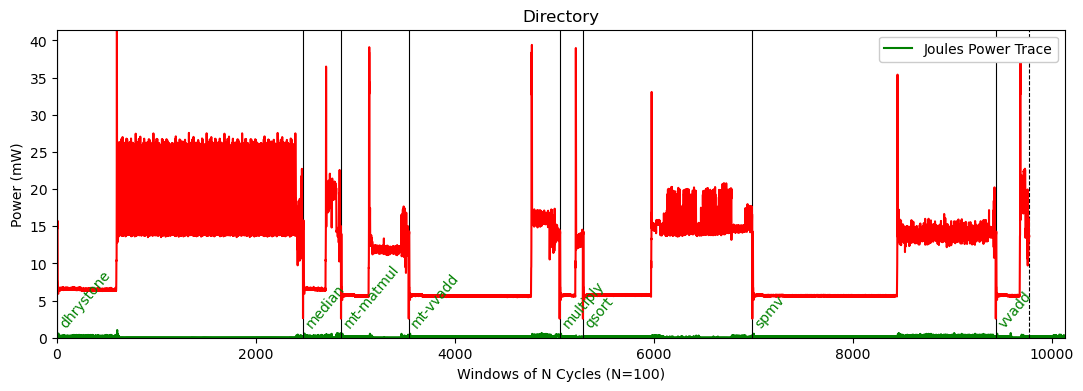

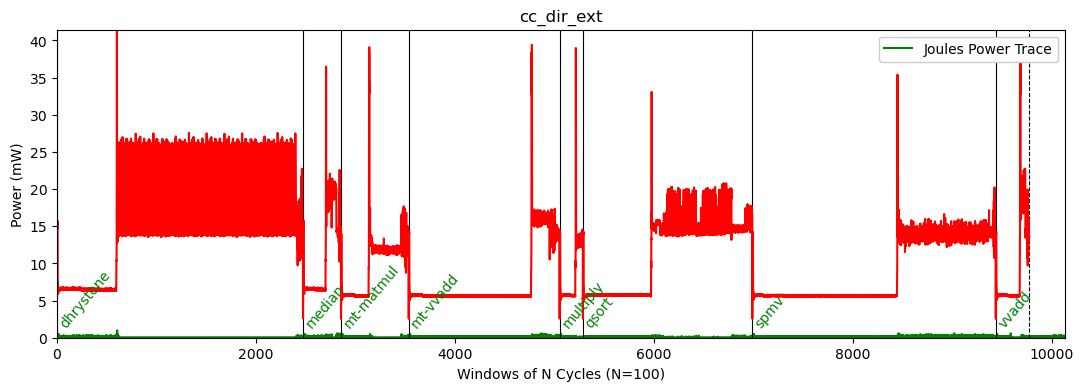

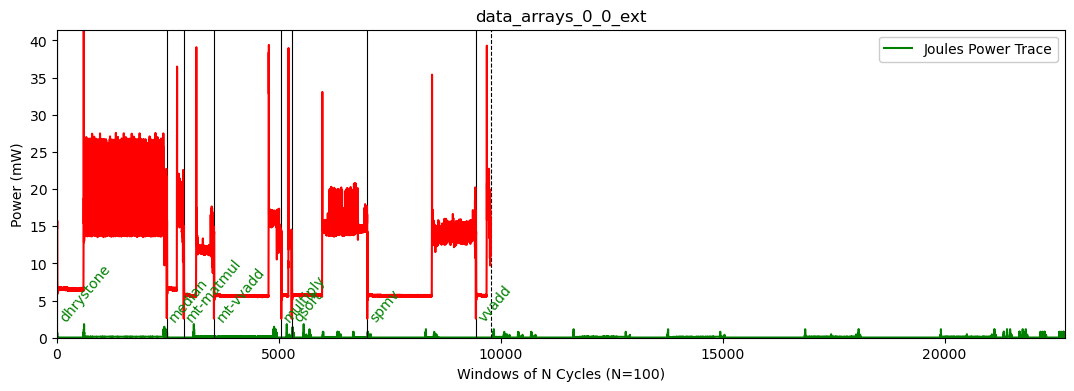

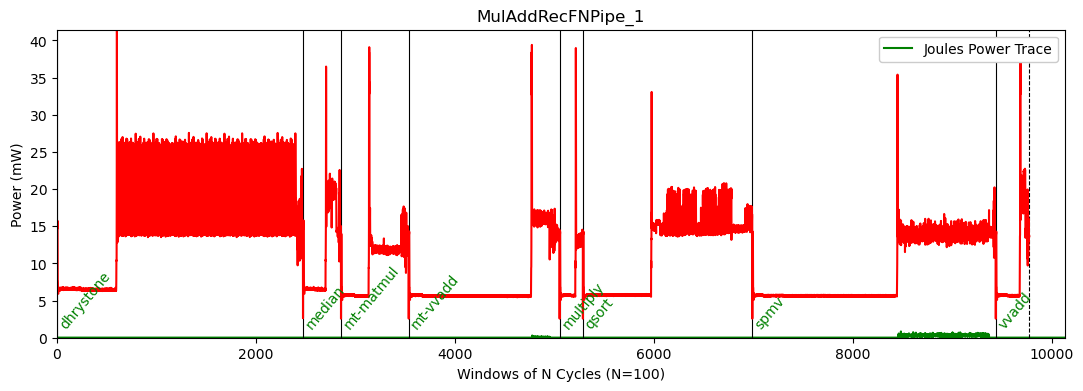

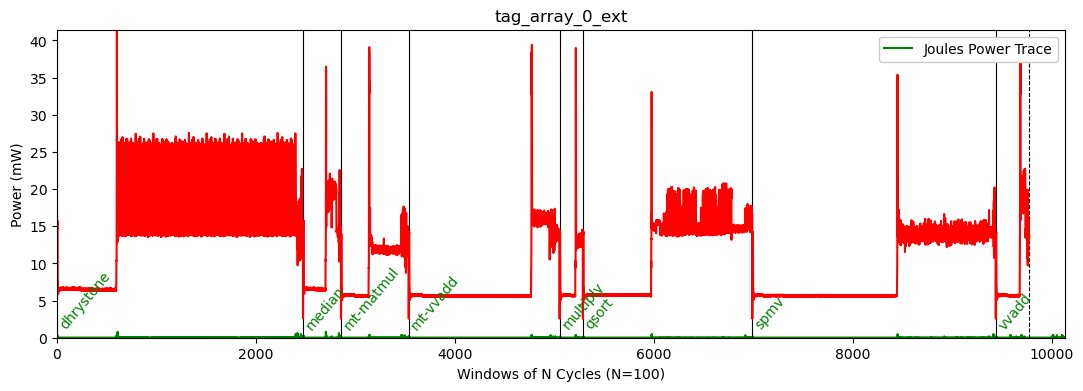

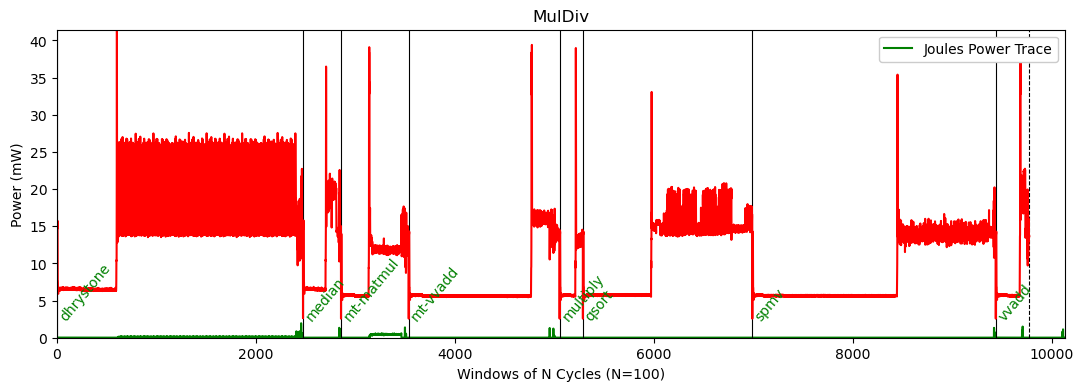

In [61]:
exec(open("/tools/C/nayiri/power/power-analysis/util.py").read())

# cutoff = 0.10 * np.percentile(final_y_test, 10)

# r2_modules = sorted(zip([module_regr_dict[m]['r2'] for m in module_regr_dict], module_regr_dict.keys()))
# r2_modules.reverse()
modules_sorted = [m for p,m in sorted([(np.mean(p),m) for m,p in module_jpower_dict.items()], reverse=True)]
i = 0
for module in modules_sorted:
    if 'regr' not in module_regr_dict[module]: continue
    regr = module_regr_dict[module]['regr']
    m_y_test = module_regr_dict[module]['y_test']
    if max(m_y_test) < cutoff: continue

    # ret_dict = predict(module_regr_dict[module]['X_test'], m_y_test, regr)
    m_y_test_norm = [100*my/y for my,y in zip(m_y_test,y_test_T)]
    
    plot_power(m_y_test,
                workload_borders=wb_test, 
                y_first=False, title=module)
    plt.plot(y_test_T,'r')
    plt.ylim(top=max(y_test_T))
    
    w_idx = 1
    i += 1
    # if i > 10: break
    # break


In [ ]:
len(y_test_T)

9776